In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
import numpy as np


In [2]:
df=pd.read_csv("banklimpio.csv")
df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_management', 'job_retired', 'job_services',
       'job_technician', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_feb',
       'month_jul', 'month_jun', 'month_may', 'month_nov', 'y_yes'],
      dtype='object')

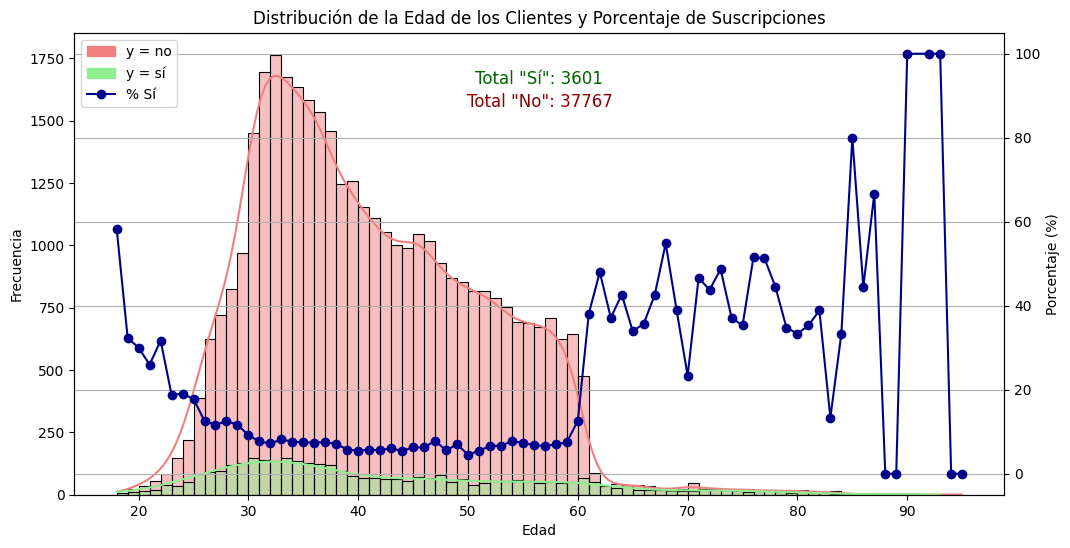

In [3]:
age_bins = range(df['age'].min(), df['age'].max() + 1)

plt.figure(figsize=(12, 6))
sns.histplot(df[df['y_yes'] == 0]['age'], bins=age_bins, color='lightcoral', edgecolor='black', kde=True)
sns.histplot(df[df['y_yes'] == 1]['age'], bins=age_bins, color='lightgreen', edgecolor='black', kde=True)

plt.xlabel('Edad')
plt.ylabel("Frecuencia")
plt.title('Distribución de la Edad de los Clientes y Porcentaje de Suscripciones')

age_counts = df.groupby('age')['y_yes'].agg(['sum', 'count'])
age_counts['percentage_yes'] = (age_counts['sum'] / age_counts['count']) * 100

second_axis = plt.gca().twinx()
second_axis.plot(age_counts.index, age_counts['percentage_yes'], color='darkblue', marker='o', linestyle='-')
second_axis.set_ylabel('Porcentaje (%)')  

legend_y_no = mpatches.Patch(color='lightcoral', label='y = no')
legend_y_yes = mpatches.Patch(color='lightgreen', label='y = sí')
legend_percentage = mlines.Line2D([], [], color='darkblue', marker='o', linestyle='-', label='% Sí')

plt.legend(handles=[legend_y_no, legend_y_yes, legend_percentage], loc='upper left')

total_yes = df['y_yes'].sum()
total_no = df['y_yes'].count() - total_yes
plt.text(0.5, 0.90, f'Total "Sí": {total_yes}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='darkgreen')
plt.text(0.5, 0.85, f'Total "No": {total_no}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='darkred')

plt.grid(True) 
plt.show()






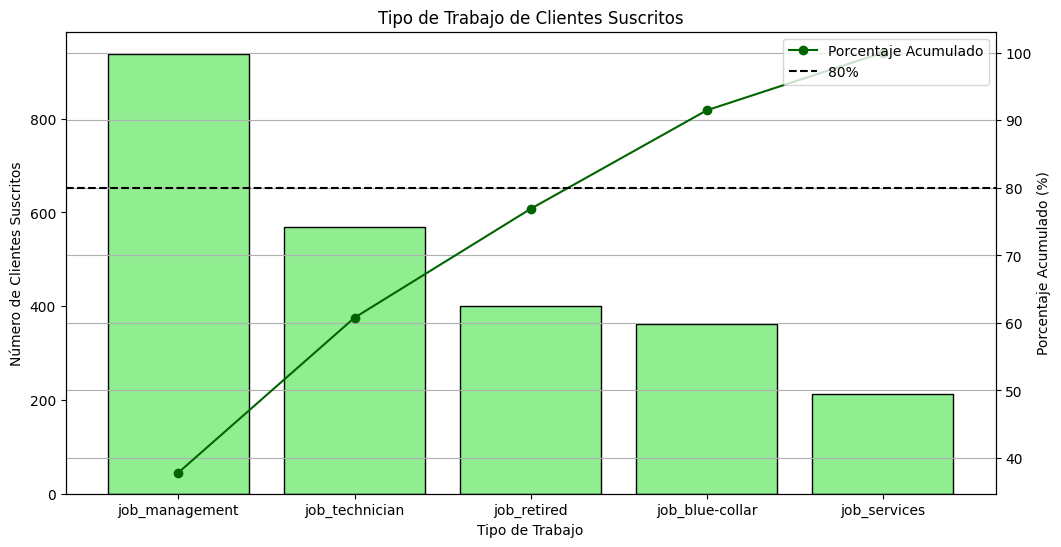

In [4]:
job_counts = df[df['y_yes'] == 1].iloc[:, df.columns.str.startswith('job_')].sum()

job_counts_sorted = job_counts.sort_values(ascending=False)
cumulative_percentage = job_counts_sorted.cumsum() / job_counts_sorted.sum() * 100

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(job_counts_sorted.index, job_counts_sorted, color='lightgreen', edgecolor='black')
ax.set_xlabel('Tipo de Trabajo')
ax.set_ylabel('Número de Clientes Suscritos')
ax.set_title('Tipo de Trabajo de Clientes Suscritos')

ax2 = ax.twinx()
ax2.plot(job_counts_sorted.index, cumulative_percentage, color='darkgreen', marker='o', linestyle='-', label='Porcentaje Acumulado')
ax2.set_ylabel('Porcentaje Acumulado (%)')
ax2.axhline(80, color='Black', linestyle='--', label='80%')

ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


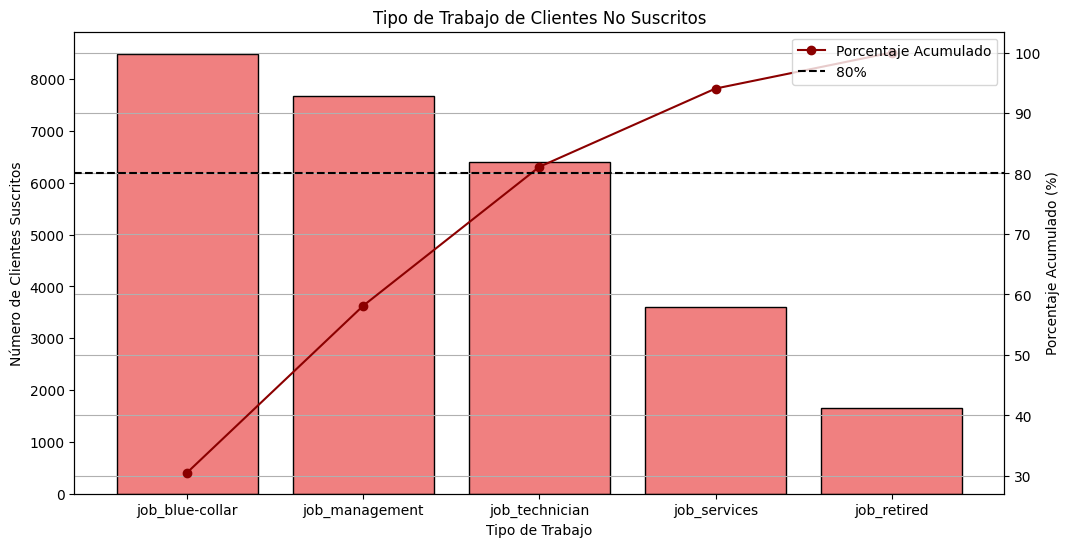

In [5]:
job_counts = df[df['y_yes'] == 0].iloc[:, df.columns.str.startswith('job_')].sum()

job_counts_sorted = job_counts.sort_values(ascending=False)
cumulative_percentage = job_counts_sorted.cumsum() / job_counts_sorted.sum() * 100

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(job_counts_sorted.index, job_counts_sorted, color='lightcoral', edgecolor='black')
ax.set_xlabel('Tipo de Trabajo')
ax.set_ylabel('Número de Clientes Suscritos')
ax.set_title('Tipo de Trabajo de Clientes No Suscritos')

ax2 = ax.twinx()
ax2.plot(job_counts_sorted.index, cumulative_percentage, color='darkred', marker='o', linestyle='-', label='Porcentaje Acumulado')
ax2.set_ylabel('Porcentaje Acumulado (%)')
ax2.axhline(80, color='Black', linestyle='--', label='80%')

ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


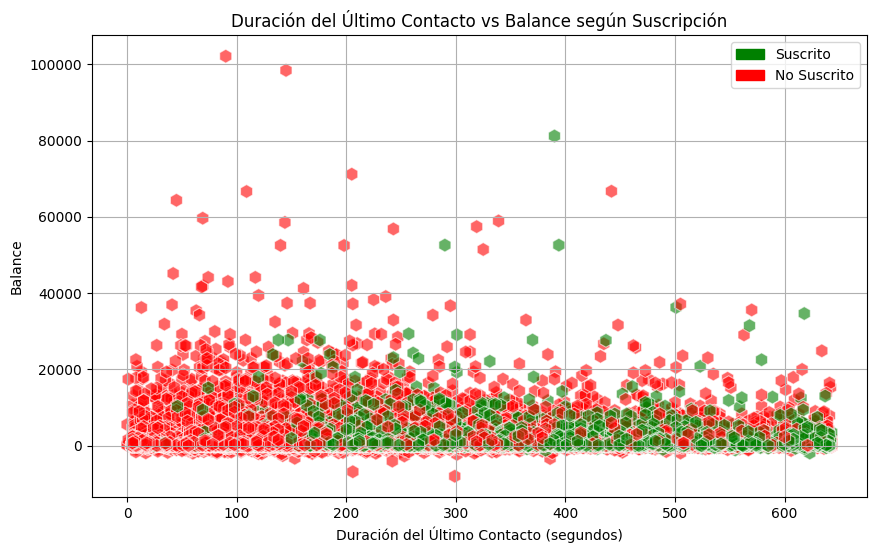

In [6]:
plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(data=df, x='duration', y='balance', hue='y_yes', 
                          palette={1: 'green', 0: 'red'}, alpha=0.6, s=100, marker="h")

plt.xlabel("Duración del Último Contacto (segundos)")
plt.ylabel("Balance")
plt.title("Duración del Último Contacto vs Balance según Suscripción")

handles = [mpatches.Patch(color='green', label='Suscrito'), 
           mpatches.Patch(color='red', label='No Suscrito')]
plt.legend(handles=handles, loc='upper right')

plt.grid(True)  
plt.show()


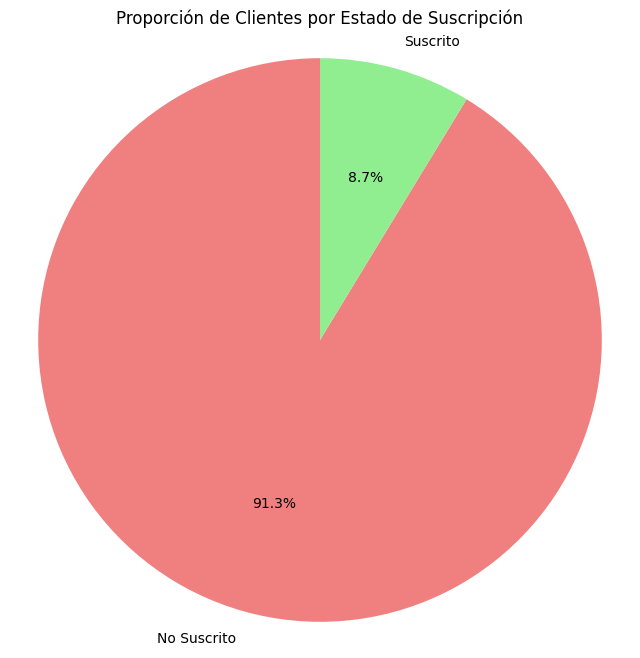

In [7]:
total_yes = df['y_yes'].sum()
total_no = df['y_yes'].count() - total_yes

plt.figure(figsize=(8, 8))

sizes = [total_no, total_yes]
labels = ['No Suscrito', 'Suscrito']
colors = ['lightcoral', 'lightgreen']  
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title("Proporción de Clientes por Estado de Suscripción")

plt.show()


C:\Users\srodr\AppData\Local\Temp\ipykernel_2772\2453860702.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y_yes', y='campaign', data=df, palette={'1': 'lightgreen', '0': 'lightcoral'}, showfliers=False, linewidth=3.5, linecolor="black")


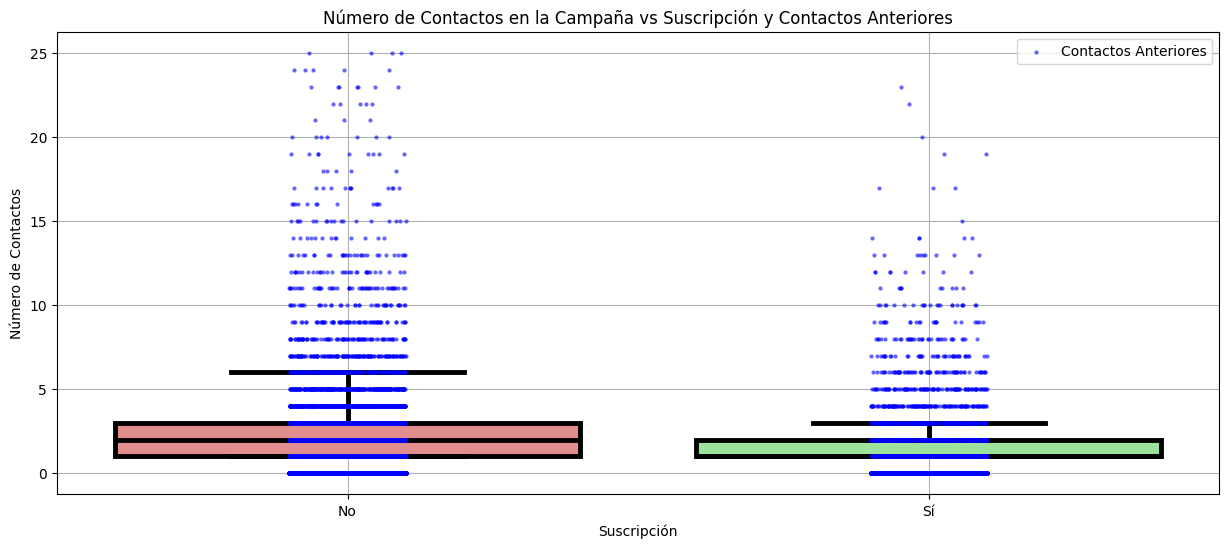

In [8]:
df = pd.read_csv("banklimpio.csv")

df['y_yes'] = df['y_yes'].astype(str)

plt.figure(figsize=(15, 6))

sns.stripplot(x='y_yes', y='previous', data=df, color='blue', alpha=0.6, jitter=True, marker='o', size=3, label='Contactos Anteriores')
plt.legend(loc='upper right', labels=["Contactos Anteriores"])

sns.boxplot(x='y_yes', y='campaign', data=df, palette={'1': 'lightgreen', '0': 'lightcoral'}, showfliers=False, linewidth=3.5, linecolor="black")

plt.xlabel("Suscripción")
plt.ylabel("Número de Contactos")
plt.title("Número de Contactos en la Campaña vs Suscripción y Contactos Anteriores")

plt.grid(True) 
plt.xticks([0, 1], ['No', 'Sí'])  
plt.show()



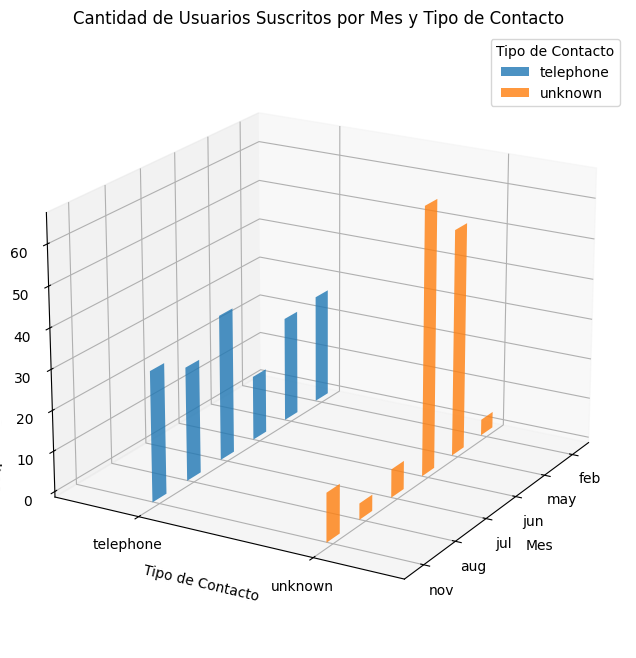

In [9]:
df = pd.read_csv("banklimpio.csv")

month_order = ['month_jan', 'month_feb', 'month_mar', 'month_apr', 'month_may', 
               'month_jun', 'month_jul', 'month_aug', 'month_sep', 'month_oct', 
               'month_nov', 'month_dec']

available_months = [month for month in month_order if month in df.columns]

contact_counts = []

for month in available_months:
    for contact_type in ['contact_telephone', 'contact_unknown']:
        count = df[(df[month] == 1) & (df[contact_type] == 1) & (df['y_yes'] == 1)].shape[0]
        contact_counts.append({
            'month': month.split('_')[1],
            'contact': contact_type.split('_')[1],
            'count': count
        })


contact_counts_df = pd.DataFrame(contact_counts)

months = contact_counts_df['month'].unique()
contact_types = contact_counts_df['contact'].unique()
count_matrix = np.zeros((len(months), len(contact_types)))

for i, month in enumerate(months):
    for j, contact_type in enumerate(contact_types):
        count = contact_counts_df[(contact_counts_df['month'] == month) & (contact_counts_df['contact'] == contact_type)]['count']
        count_matrix[i, j] = count.values[0] if not count.empty else 0

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x_pos = np.arange(len(months))
y_pos = np.arange(len(contact_types))

for j in range(len(contact_types)):
    ax.bar(x_pos, count_matrix[:, j], zs=j, zdir='y', alpha=0.8, width=0.4, label=contact_types[j])

ax.set_xlabel('Mes')
ax.set_ylabel('Tipo de Contacto')
ax.set_zlabel('Cantidad de Usuarios Suscritos')
ax.set_title('Cantidad de Usuarios Suscritos por Mes y Tipo de Contacto')

ax.set_xticks(x_pos)
ax.set_xticklabels(months)

ax.set_yticks(y_pos)
ax.set_yticklabels(contact_types)

ax.set_ylim([-0.5, len(contact_types) - 0.5])  

ax.zaxis.label.set_size(12) 
ax.zaxis.label.set_color('black')

ax.legend(title='Tipo de Contacto', loc='upper right')

ax.view_init(elev=20, azim=30)

plt.show()


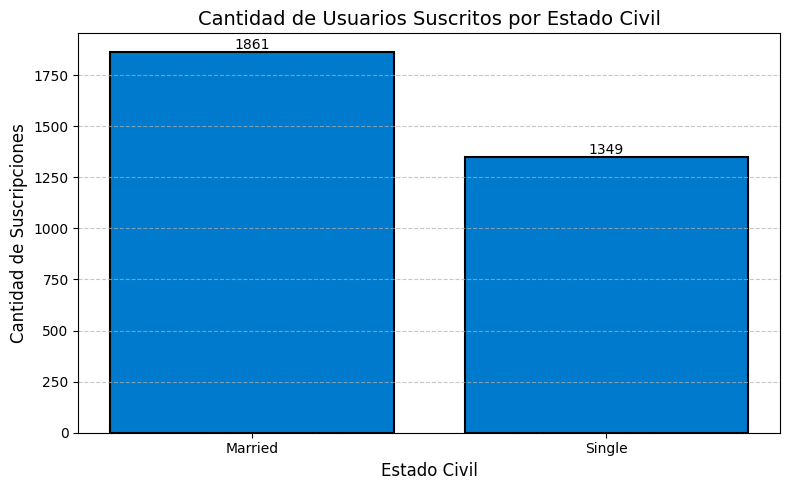

In [10]:
df = pd.read_csv("banklimpio.csv")

marital_counts = {
    'Married': df[(df['marital_married'] == 1) & (df['y_yes'] == 1)].shape[0],
    'Single': df[(df['marital_single'] == 1) & (df['y_yes'] == 1)].shape[0],
}

marital_counts_df = pd.DataFrame(list(marital_counts.items()), columns=['Estado Civil', 'Cantidad de Suscripciones'])

plt.figure(figsize=(8, 5))
bars = plt.bar(marital_counts_df['Estado Civil'], marital_counts_df['Cantidad de Suscripciones'], color='#007ACC', edgecolor='black', linewidth=1.5)

plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Cantidad de Suscripciones', fontsize=12)
plt.title('Cantidad de Usuarios Suscritos por Estado Civil', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()  
plt.show()



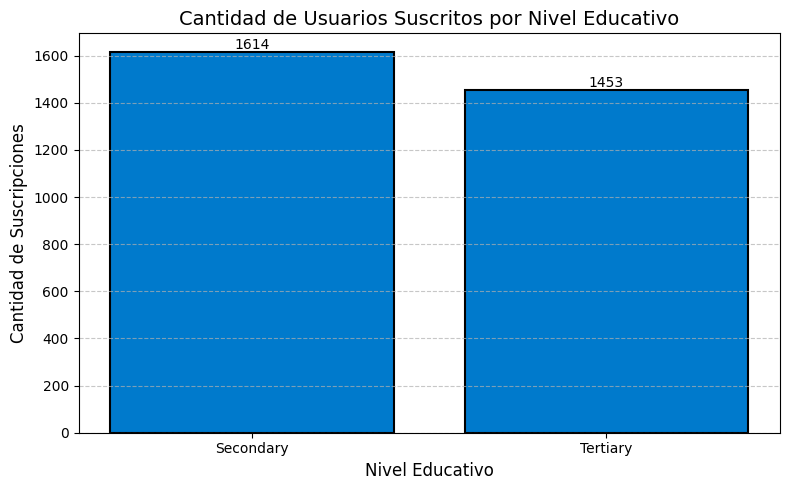

In [11]:
df = pd.read_csv("banklimpio.csv")

education_counts = {
    'Secondary': df[(df['education_secondary'] == 1) & (df['y_yes'] == 1)].shape[0],
    'Tertiary': df[(df['education_tertiary'] == 1) & (df['y_yes'] == 1)].shape[0],
}

education_counts_df = pd.DataFrame(list(education_counts.items()), columns=['Nivel Educativo', 'Cantidad de Suscripciones'])

plt.figure(figsize=(8, 5))
bars = plt.bar(education_counts_df['Nivel Educativo'], education_counts_df['Cantidad de Suscripciones'], color='#007ACC', edgecolor='black', linewidth=1.5)

plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Cantidad de Suscripciones', fontsize=12)
plt.title('Cantidad de Usuarios Suscritos por Nivel Educativo', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Activar cuadrícula en el eje Y

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()  
plt.show()


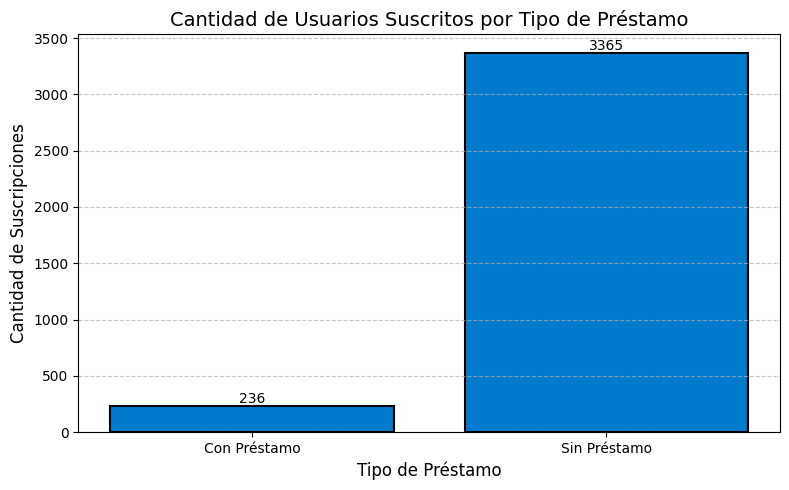

In [12]:
df = pd.read_csv("banklimpio.csv")

loan_counts = {
    'Con Préstamo': df[(df['loan_yes'] == 1) & (df['y_yes'] == 1)].shape[0],
    'Sin Préstamo': df[(df['loan_yes'] == 0) & (df['y_yes'] == 1)].shape[0],
}

loan_counts_df = pd.DataFrame(list(loan_counts.items()), columns=['Tipo de Préstamo', 'Cantidad de Suscripciones'])

plt.figure(figsize=(8, 5))
bars_loan = plt.bar(loan_counts_df['Tipo de Préstamo'], loan_counts_df['Cantidad de Suscripciones'], color='#007ACC', edgecolor='black', linewidth=1.5)
plt.xlabel('Tipo de Préstamo', fontsize=12)
plt.ylabel('Cantidad de Suscripciones', fontsize=12)
plt.title('Cantidad de Usuarios Suscritos por Tipo de Préstamo', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  

for bar in bars_loan:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()  
plt.show()



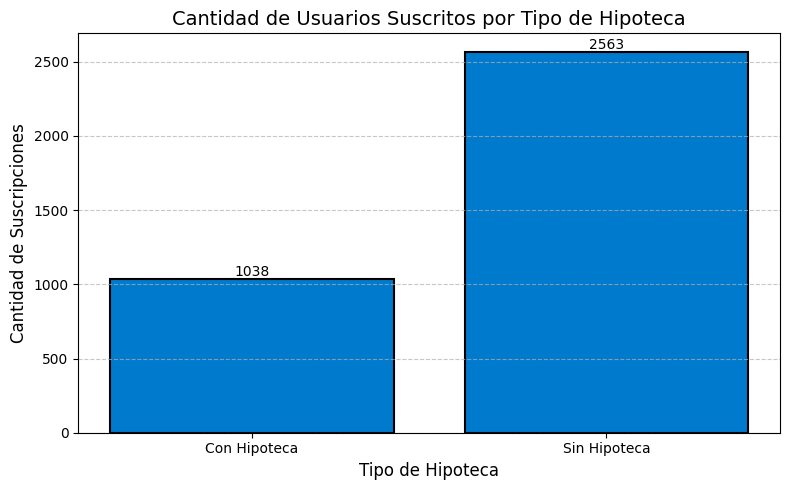

In [13]:
df = pd.read_csv("banklimpio.csv")

housing_counts = {
    'Con Hipoteca': df[(df['housing_yes'] == 1) & (df['y_yes'] == 1)].shape[0],
    'Sin Hipoteca': df[(df['housing_yes'] == 0) & (df['y_yes'] == 1)].shape[0],
}

housing_counts_df = pd.DataFrame(list(housing_counts.items()), columns=['Tipo de Hipoteca', 'Cantidad de Suscripciones'])

plt.figure(figsize=(8, 5))
bars_housing = plt.bar(housing_counts_df['Tipo de Hipoteca'], housing_counts_df['Cantidad de Suscripciones'], color='#007ACC', edgecolor='black', linewidth=1.5)
plt.xlabel('Tipo de Hipoteca', fontsize=12)
plt.ylabel('Cantidad de Suscripciones', fontsize=12)
plt.title('Cantidad de Usuarios Suscritos por Tipo de Hipoteca', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7) 

for bar in bars_housing:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

plt.tight_layout()  
plt.show()


C:\Users\srodr\AppData\Local\Temp\ipykernel_2772\1221930131.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='y_yes', y='pdays', data=df, palette={"0": "lightcoral", "1": "lightgreen"})


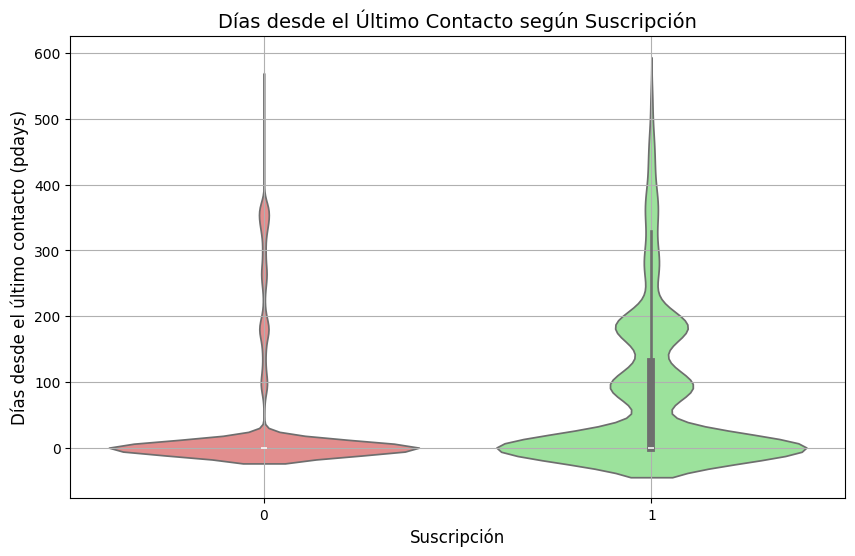

In [15]:
df = pd.read_csv("banklimpio.csv")


plt.figure(figsize=(10, 6))
sns.violinplot(x='y_yes', y='pdays', data=df, palette={"0": "lightcoral", "1": "lightgreen"})

plt.xlabel('Suscripción', fontsize=12)
plt.ylabel('Días desde el último contacto (pdays)', fontsize=12)
plt.title('Días desde el Último Contacto según Suscripción', fontsize=14)

plt.grid(True) 
plt.show()